In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
from pingouin import kruskal
sns.set_theme(rc={'figure.figsize':(16,4)})

In [1]:
prod_df = pd.read_csv('Production.xls - Sheet1.csv')

NameError: name 'pd' is not defined

In [3]:
prod_df.head()

,Week,Date,Hour,Line no.,Operator,Actual weight (in g),VENDOR
0,3,24,9,2,O1,150,V2
1,3,24,9,2,O1,150.2,V2
2,3,24,9,2,O1,150.3,V2
3,3,24,9,2,O1,150.2,V2
4,3,24,9,2,O1,150.1,V2


In [4]:
prod_df.tail()

,Week,Date,Hour,Line no.,Operator,Actual weight (in g),VENDOR
665,1,4,15,1,O5,150.2,V3
666,1,4,15,1,O5,150.1,V3
667,1,4,15,1,O5,150.2,V3
668,1,4,15,1,O5,150.1,V3
669,1,4,15,1,O5,150.2,V3


In [5]:
prod_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 670 entries, 0 to 669
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Week                   670 non-null    int64 
 1   Date                   670 non-null    int64 
 2   Hour                   670 non-null    int64 
 3   Line no.               670 non-null    int64 
 4   Operator               670 non-null    object
 5   Actual weight  (in g)  670 non-null    object
 6   VENDOR                 670 non-null    object
dtypes: int64(4), object(3)
memory usage: 36.8+ KB


In [6]:
prod_df['Actual weight  (in g)'].unique()

array(['150', '150.2', '150.3', '150.1', '149.9', '*', '150.5', '150.4',
       '150.35', '149.85', '150.05', '149.95', '150.25', '150.45',
       '149.8'], dtype=object)

In [7]:
prod_df.columns[prod_df.isin(['*']).any()]

Index(['Actual weight  (in g)'], dtype='object')

In [8]:
prod_df[prod_df['Actual weight  (in g)'] == '*']

,Week,Date,Hour,Line no.,Operator,Actual weight (in g),VENDOR
280,2,7,19,1,O1,*,V2


In [39]:
prod_df.drop(prod_df[prod_df['Actual weight  (in g)'] == '*'].index,inplace=True)

In [10]:
len(prod_df)

669

In [40]:
prod_df['Actual weight  (in g)'] = pd.to_numeric(prod_df['Actual weight  (in g)'])

<Axes: xlabel='Actual weight  (in g)', ylabel='Count'>

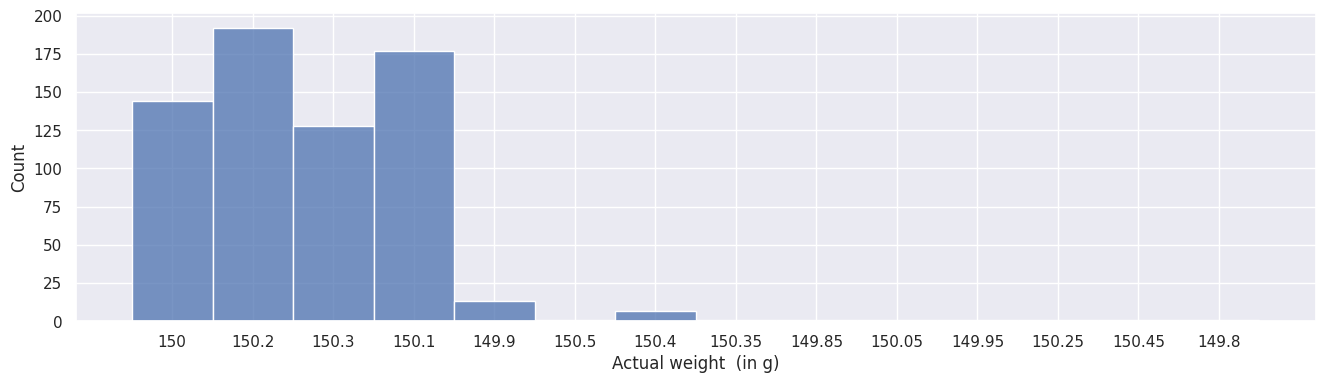

In [11]:
sns.histplot(prod_df['Actual weight  (in g)'])

The data isn't normal

In [12]:
prod_df.columns

Index(['Week', 'Date', 'Hour', 'Line no.', 'Operator', 'Actual weight  (in g)',
       'VENDOR'],
      dtype='object')

In [13]:
unique_elems = {k:prod_df[k].unique() for k in prod_df.columns }

In [14]:
unique_elems

{'Week': array([3, 2, 1]),
 'Date': array([24,  6,  7,  8, 11,  4]),
 'Hour': array([ 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23,  1,  2,
         3,  4,  5,  6,  7,  8]),
 'Line no.': array([2, 1]),
 'Operator': array(['O1', 'O2', 'O3', 'O4', 'O5'], dtype=object),
 'Actual weight  (in g)': array(['150', '150.2', '150.3', '150.1', '149.9', '150.5', '150.4',
        '150.35', '149.85', '150.05', '149.95', '150.25', '150.45',
        '149.8'], dtype=object),
 'VENDOR': array(['V2', 'V3', 'V1'], dtype=object)}

In [15]:
len(unique_elems['Hour'])%3

2

In [16]:
len(unique_elems['Hour'])//3

7

In [17]:
len(unique_elems['Date'])%3

0

In [18]:
len(unique_elems['Date'])//3

2

```python
for i in unique_elems.keys():
    num_vals = len(unique_elems[i])
    if i == 'Actual weight  (in g)': continue
    if num_vals > 3: nrows,ncols = num_vals%3,num_vals//3
    else: nrows,ncols = 1,num_vals
    if nrows==0:nrows = 1
    fig , axs = plt.subplots(nrows,ncols,figsize=(35,8))
    for _,ii in enumerate(unique_elems[i]):
        tmp = prod_df[prod_df[i] == ii]['Actual weight  (in g)']
        if nrows==1: sns.histplot(ax=axs[_],data=tmp).set_xlabel(f'{i}-{ii}')
        if nrows>1: sns.histplot(ax=axs[_],data=tmp).set_xlabel(f'{i}-{ii}')
```

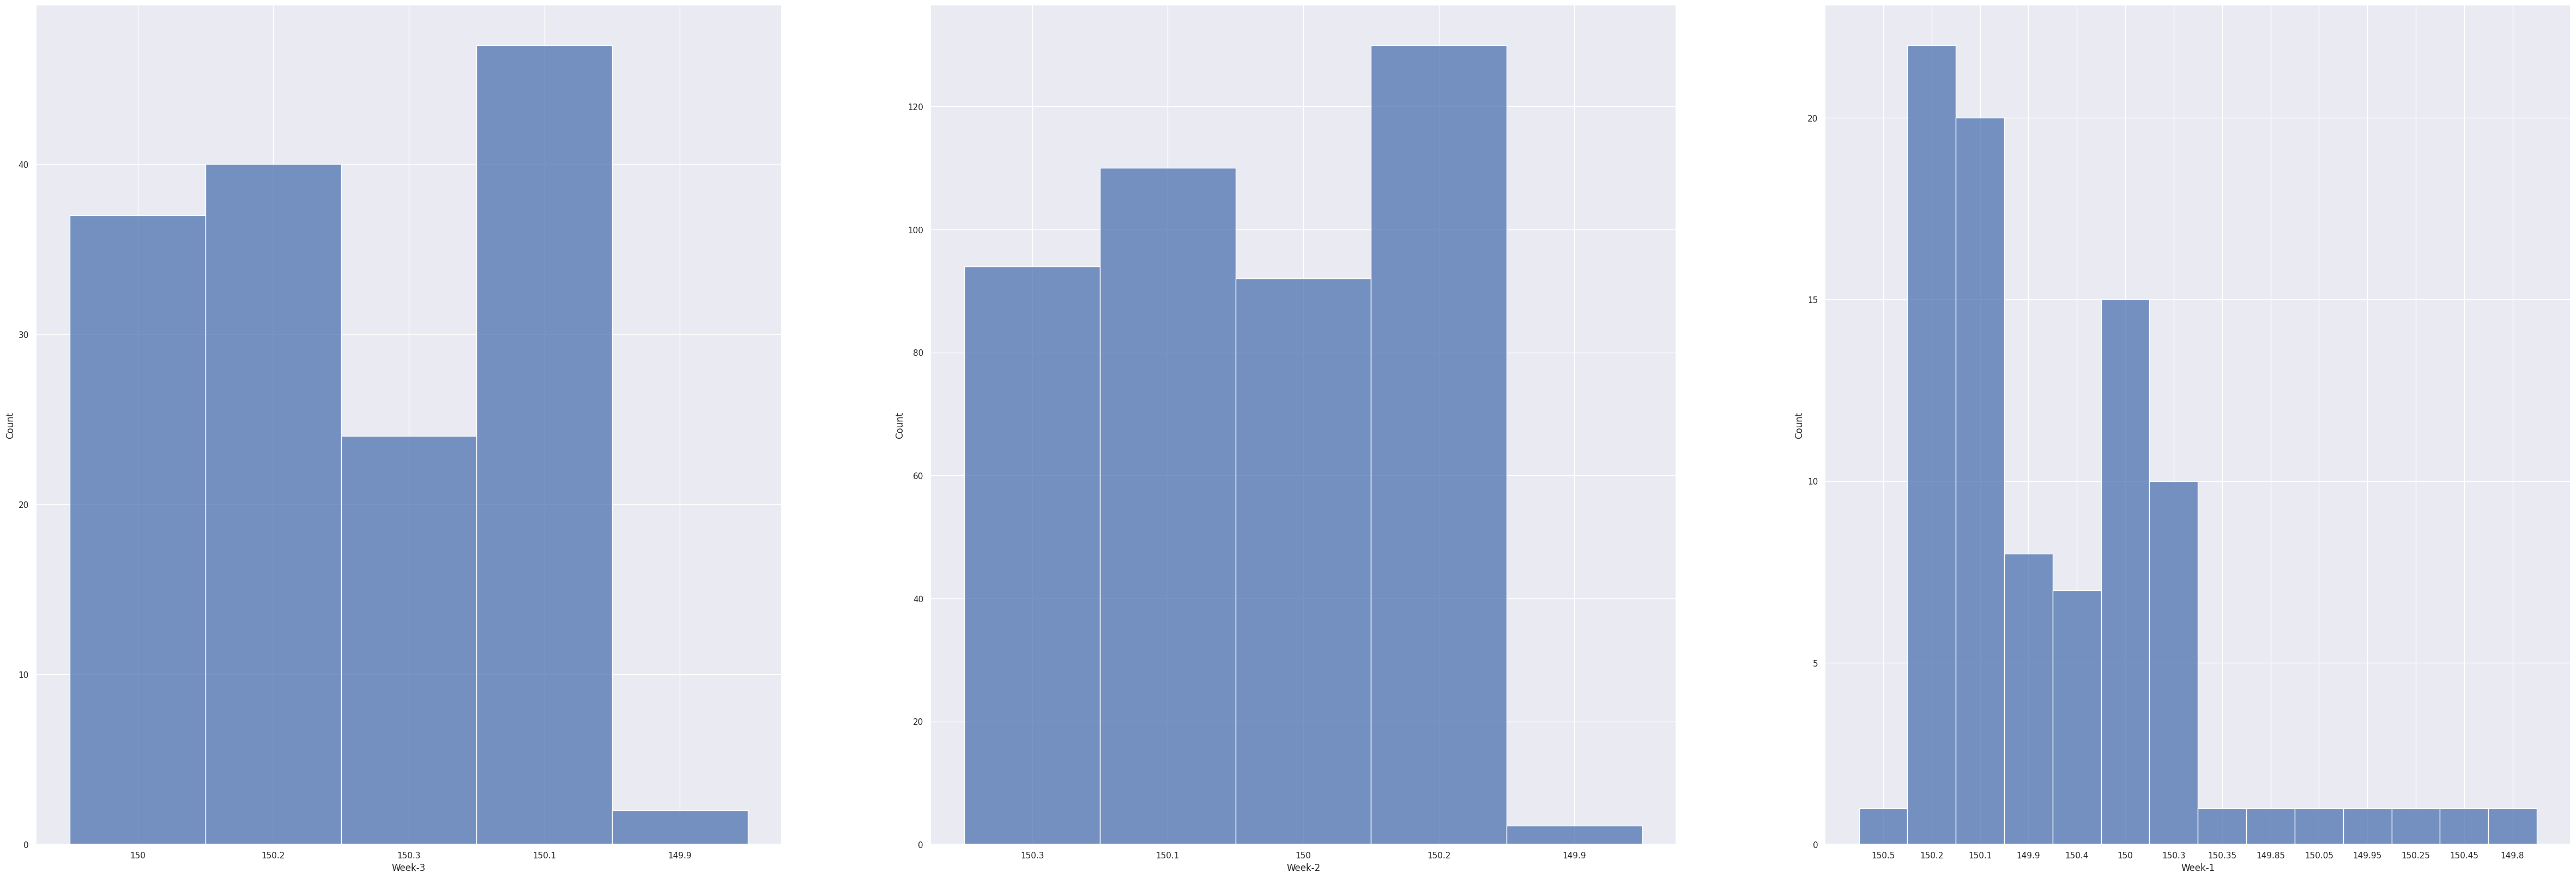

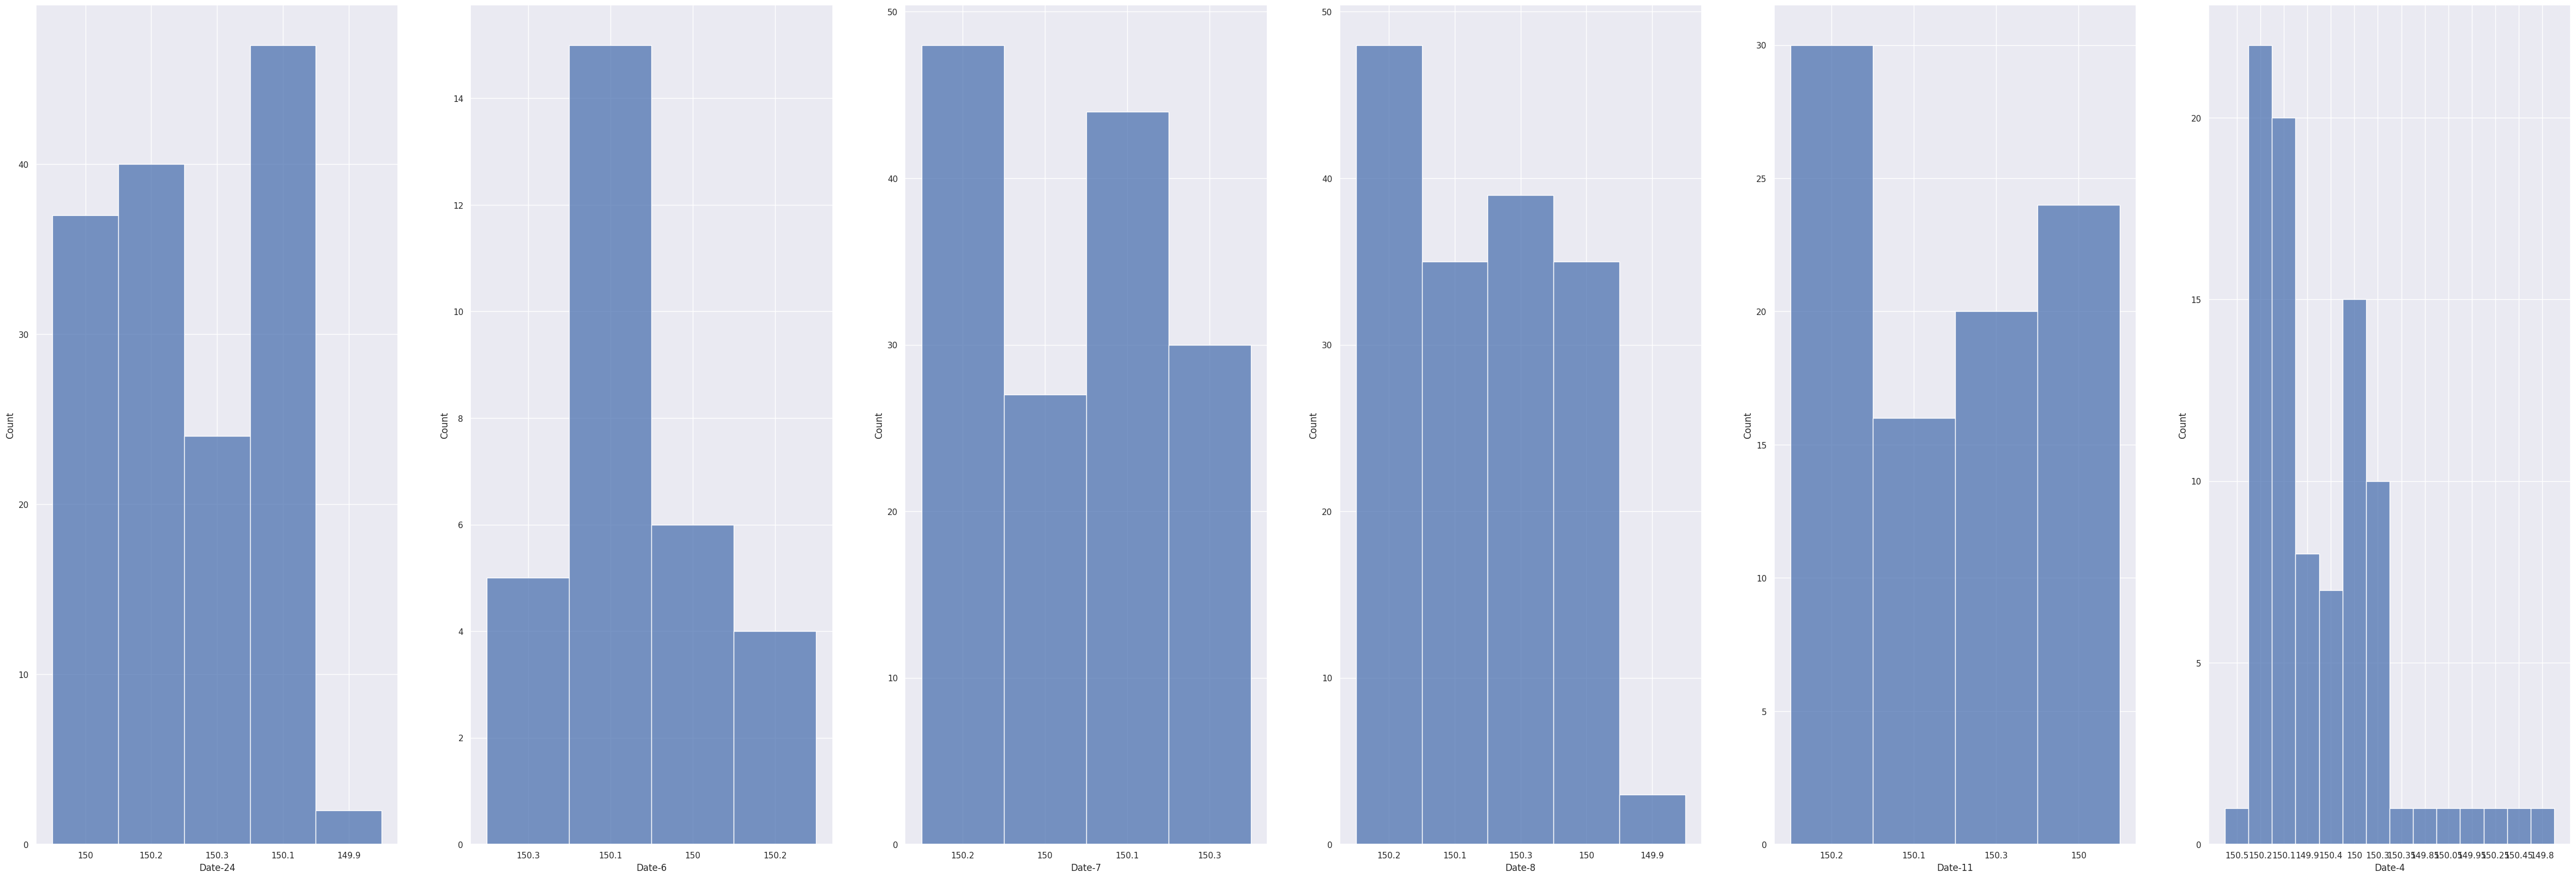

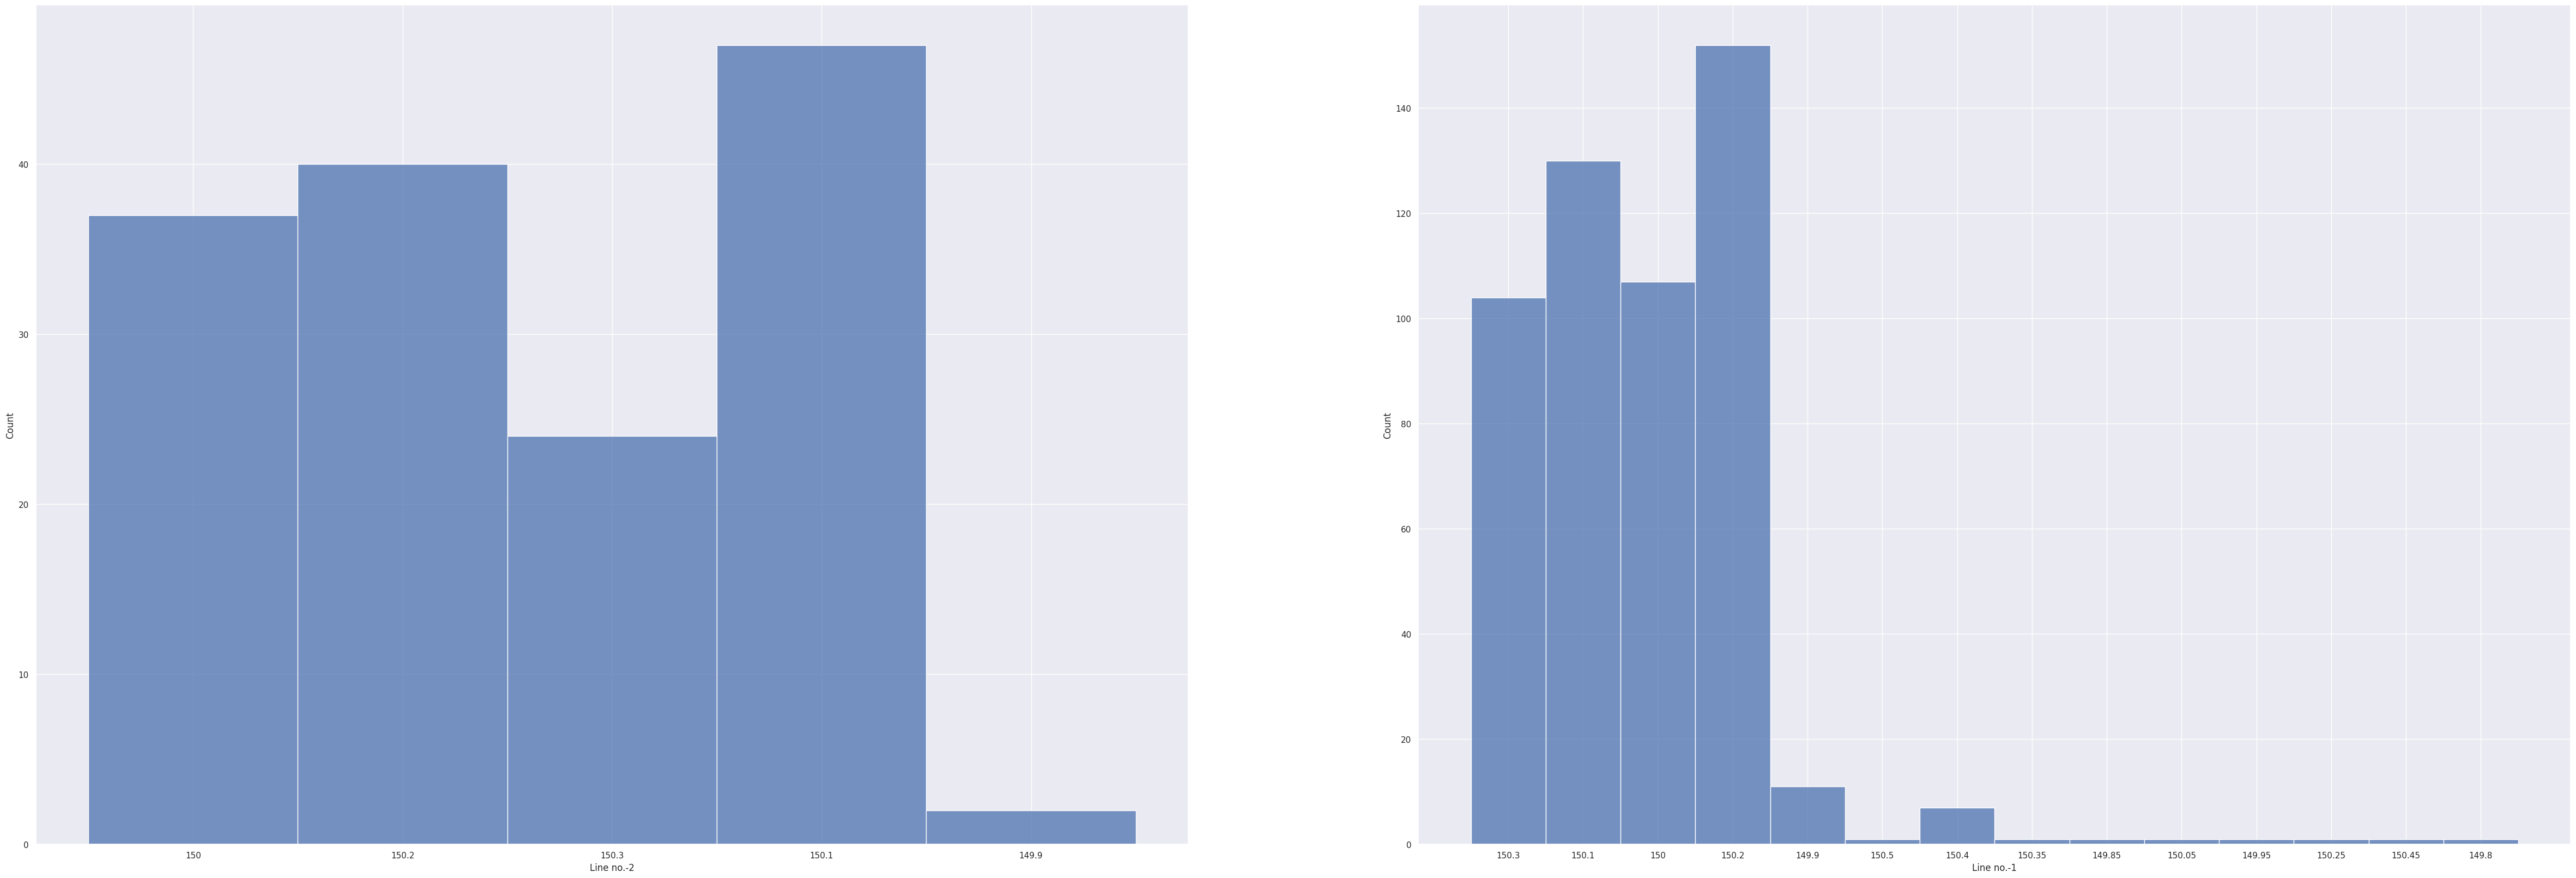

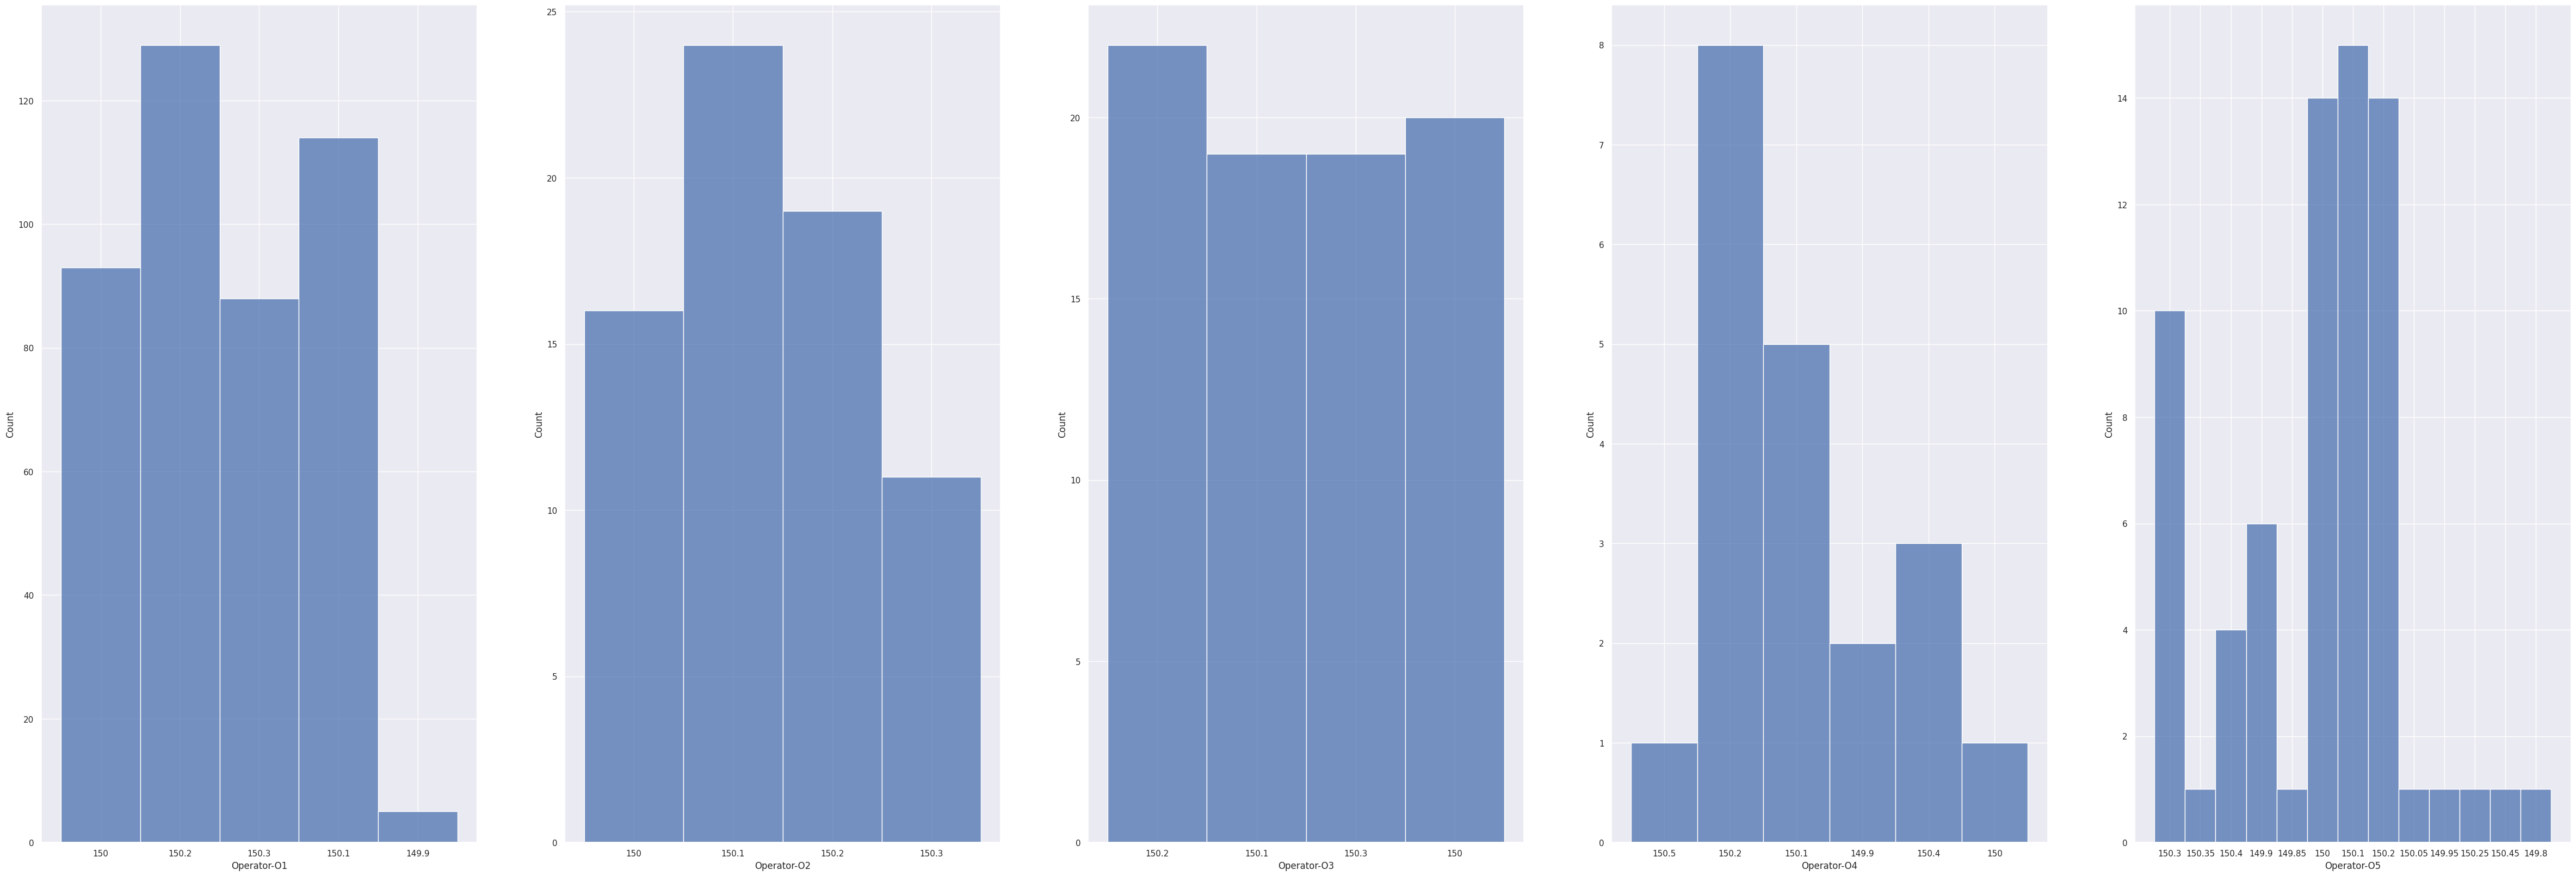

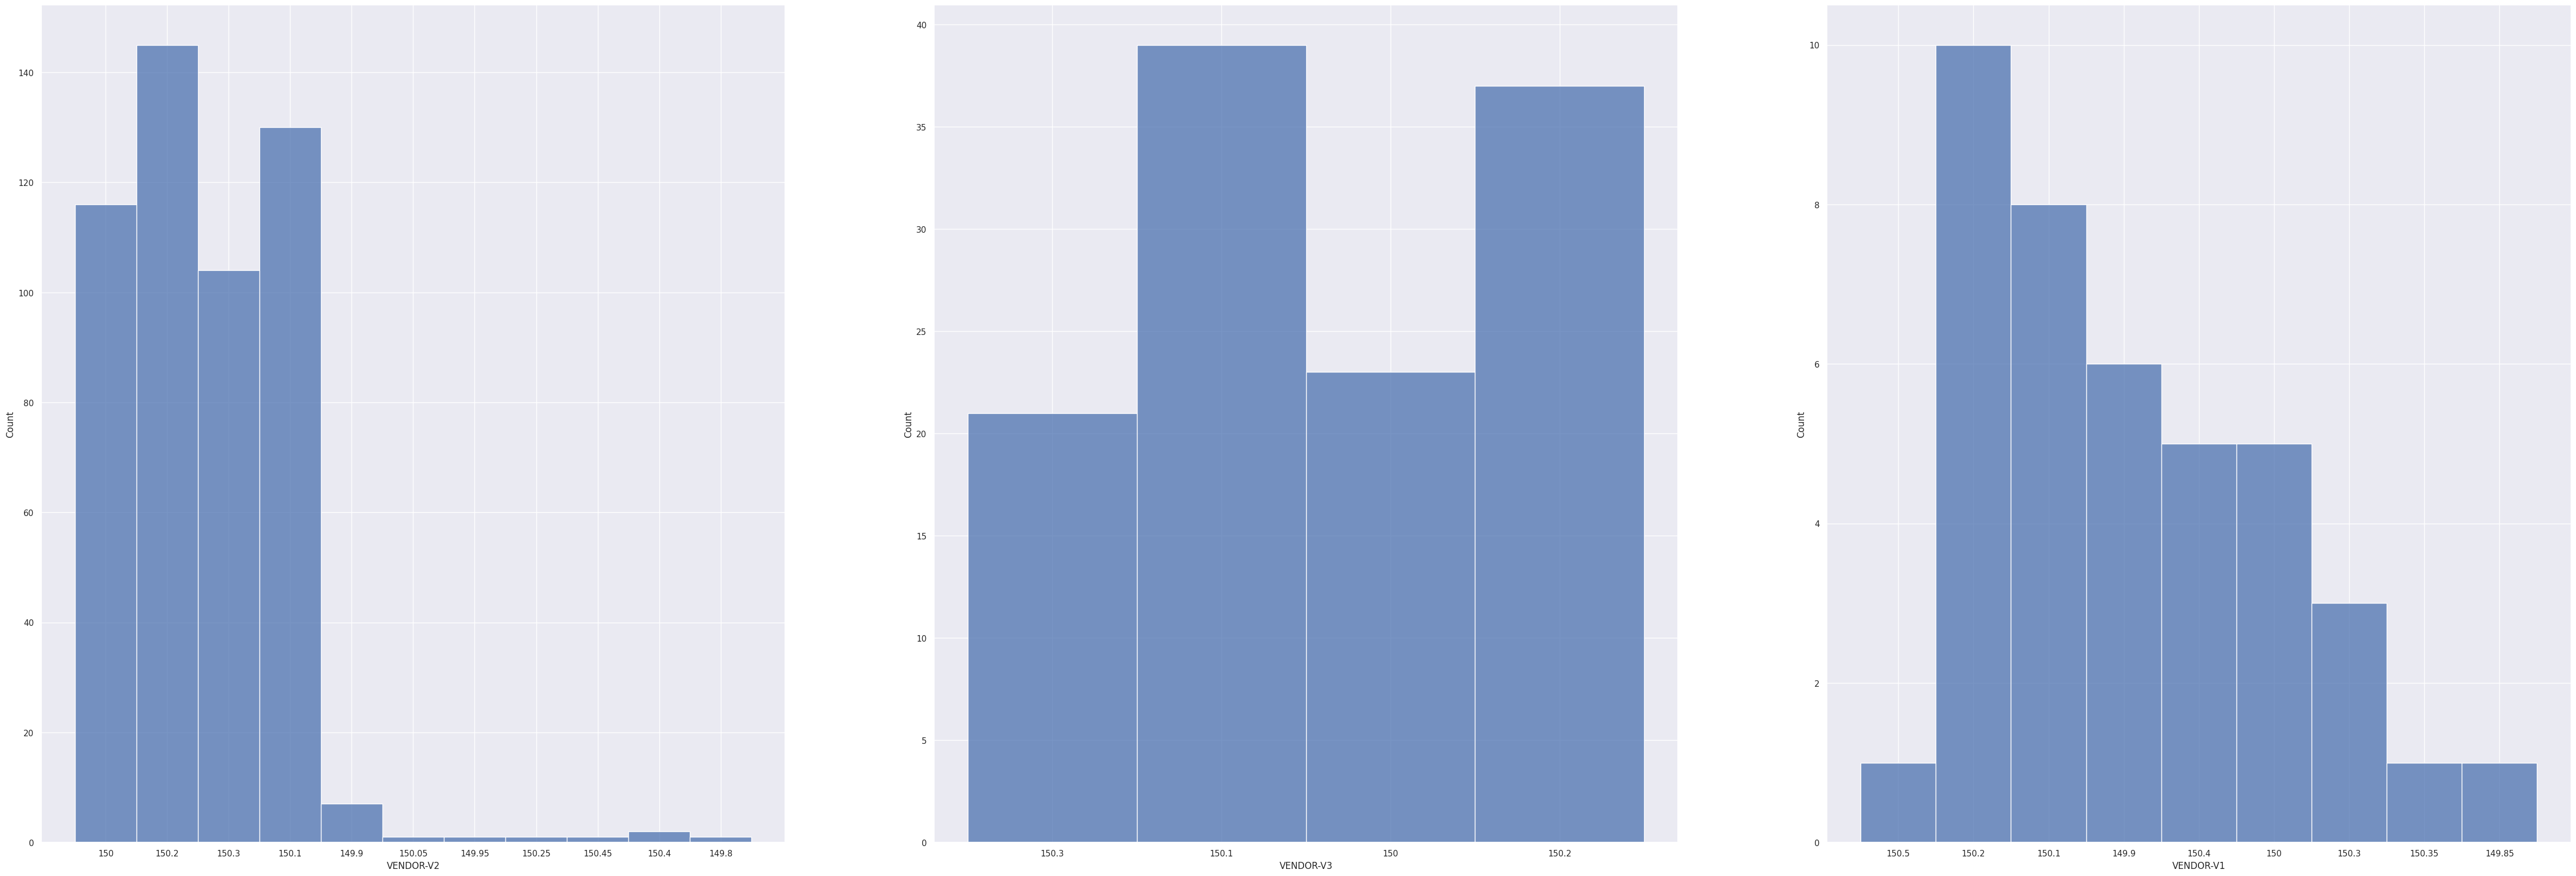

In [19]:
for i in unique_elems.keys():
    if i in ['Actual weight  (in g)', 'Hour']: continue
    fig , axs = plt.subplots(1,len(unique_elems[i]),figsize=(60,20))
    for _,ii in enumerate(unique_elems[i]):
        tmp = prod_df[prod_df[i] == ii]['Actual weight  (in g)']
        sns.histplot(ax=axs[_],data=tmp).set_xlabel(f'{i}-{ii}')

```python
[i,ii in zip(unique_elems['Hour'],[i for i in range(0,5)])]
```

In [22]:
unique_elems['Hour']

array([ 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23,  1,  2,
        3,  4,  5,  6,  7,  8])

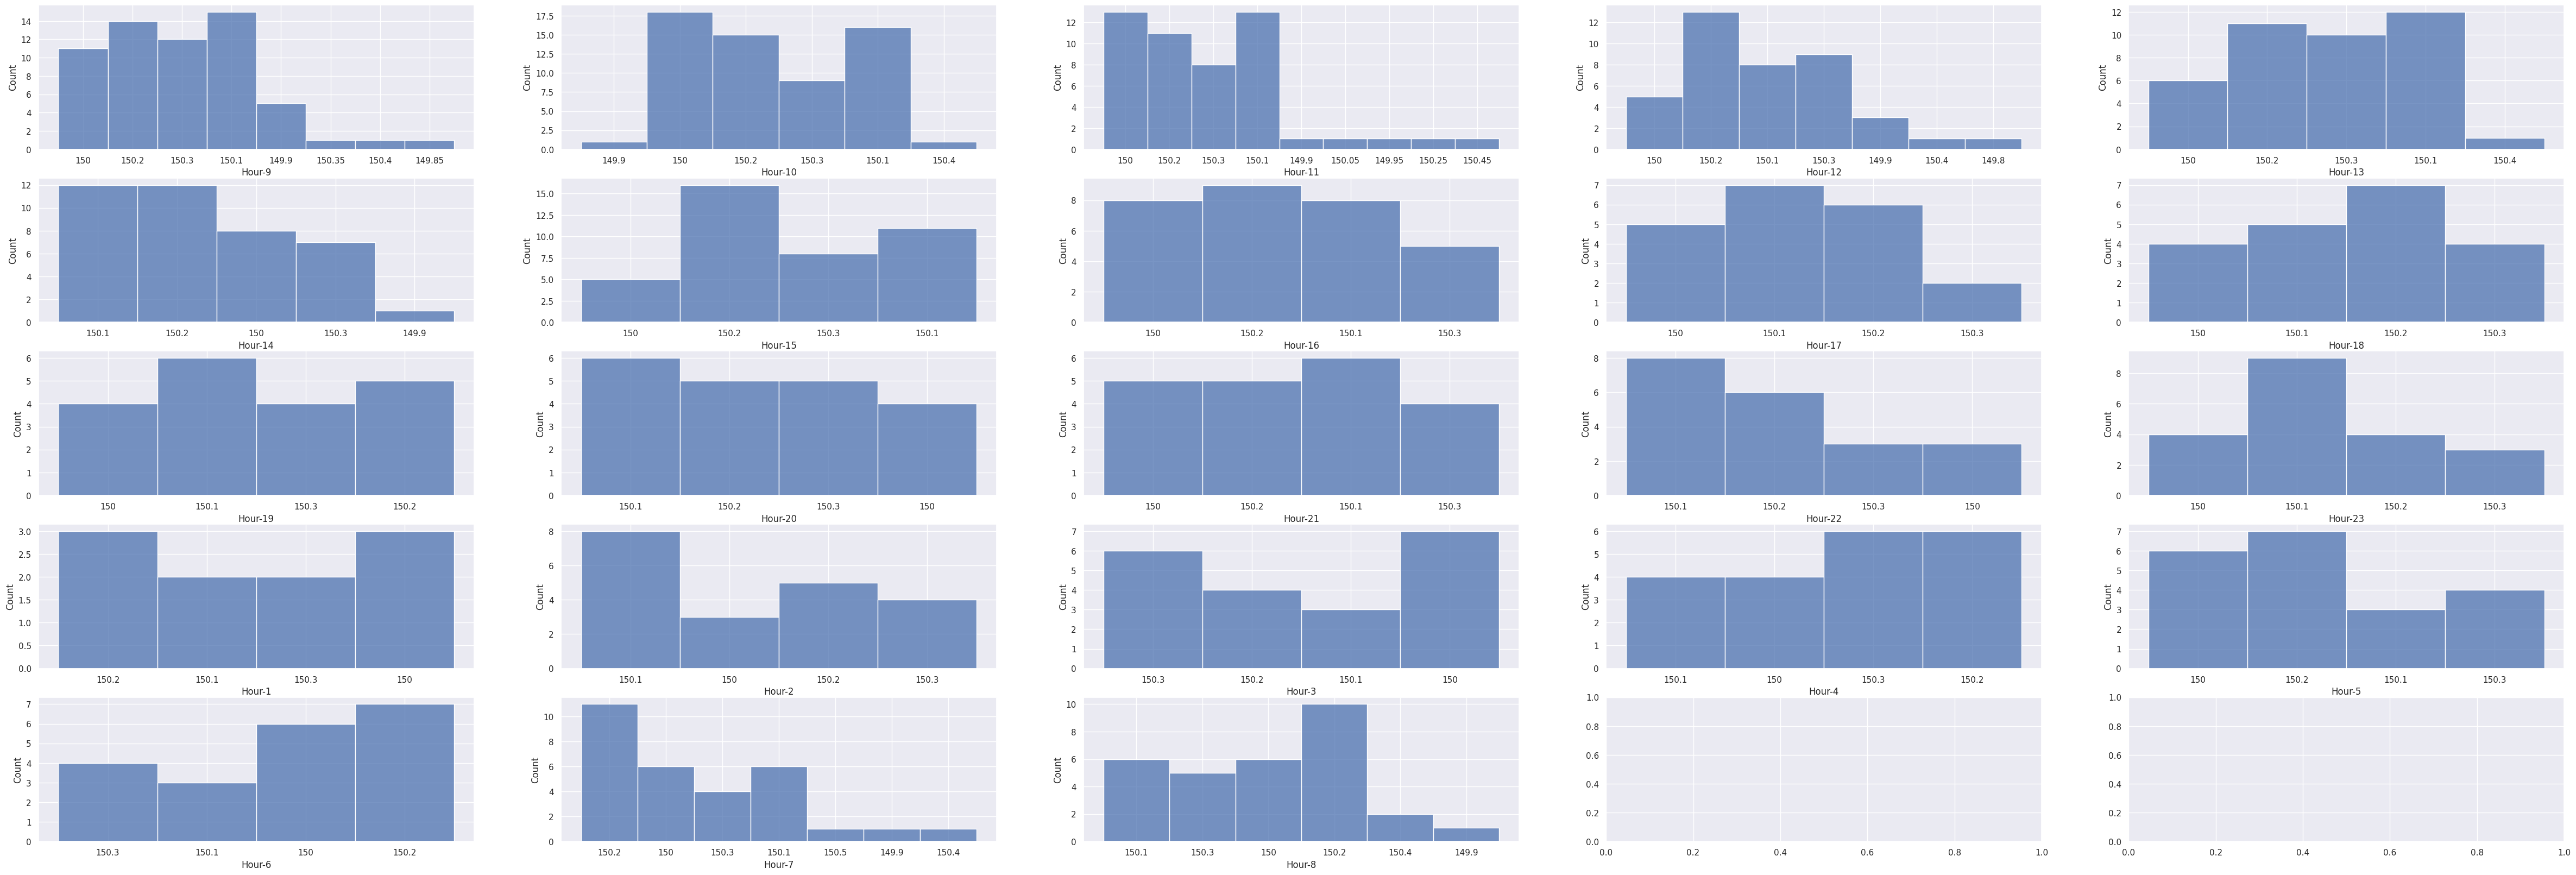

In [23]:
fig , axs = plt.subplots(5,5,figsize=(60,20))
row,col = 0,0
for ii in unique_elems['Hour']:
    tmp = prod_df[prod_df['Hour'] == ii]['Actual weight  (in g)']
    if col == 5: row, col = row+1,0
    sns.histplot(ax=axs[row,col],data=tmp).set_xlabel(f'Hour-{ii}')
    col += 1

In [34]:
prod_df.head()

,Week,Date,Hour,Line no.,Operator,Actual weight (in g),VENDOR
0,3,24,9,2,1,150.0,2
1,3,24,9,2,1,150.2,2
2,3,24,9,2,1,150.3,2
3,3,24,9,2,1,150.2,2
4,3,24,9,2,1,150.1,2


In [30]:
unique_elems

{'Week': array([3, 2, 1]),
 'Date': array([24,  6,  7,  8, 11,  4]),
 'Hour': array([ 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23,  1,  2,
         3,  4,  5,  6,  7,  8]),
 'Line no.': array([2, 1]),
 'Operator': array(['O1', 'O2', 'O3', 'O4', 'O5'], dtype=object),
 'Actual weight  (in g)': array(['150', '150.2', '150.3', '150.1', '149.9', '150.5', '150.4',
        '150.35', '149.85', '150.05', '149.95', '150.25', '150.45',
        '149.8'], dtype=object),
 'VENDOR': array(['V2', 'V3', 'V1'], dtype=object)}

In [36]:
prod_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 669 entries, 0 to 669
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Week                   669 non-null    int64  
 1   Date                   669 non-null    int64  
 2   Hour                   669 non-null    int64  
 3   Line no.               669 non-null    int64  
 4   Operator               669 non-null    int64  
 5   Actual weight  (in g)  669 non-null    float64
 6   VENDOR                 669 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 41.8 KB


In [31]:
prod_df['VENDOR'] = np.where(prod_df['VENDOR'] == 'V1',1,np.where(prod_df['VENDOR'] == 'V2',2,3))

In [33]:
prod_df['Operator'] = np.where(prod_df['Operator'] == 'O1',1,np.where(prod_df['VENDOR'] == 'O2',2,np.where(prod_df['Operator']=='O3',3,np.where(prod_df['VENDOR']=='O4',4,5))))

In [41]:
kruskal(data=prod_df,dv='Actual weight  (in g)',between='Operator')

,Source,ddof1,H,p-unc
Kruskal,Operator,4,2.925456,0.570377


In [42]:
kruskal(data=prod_df,dv='Actual weight  (in g)',between='Line no.')

,Source,ddof1,H,p-unc
Kruskal,Line no.,1,3.056507,0.080414


In [80]:
def res_check(bw_var, p_val, los=0.05):
    if p_val < los:
        print(f'The p-value of {round(p_val,6)} is less than the level of significance of {int(los*100)}%, therefore we can reject the null hypothesis.  Hence the median value for actual weight in gms do differ significantly for atleast 1 level of {bw_var}\n')
    else:
        print(f'The p-value of {round(p_val,6)} is greater than or equal to the level of significance of {int(los*100)}%, therefore we do not reject the null hypothesis.Hence the median value for actual weight in gms do not differ significantly for all levels of {bw_var}\n')

In [50]:
prod_df.columns

Index(['Week', 'Date', 'Hour', 'Line no.', 'Operator', 'Actual weight  (in g)',
       'VENDOR'],
      dtype='object')

In [55]:
list(prod_df.columns).pop(list(prod_df.columns).index('Actual weight  (in g)'))

'Actual weight  (in g)'

In [63]:
res

,Source,ddof1,H,p-unc
Kruskal,Week,2,3.90978,0.14158


In [64]:
res['H']

Kruskal    3.90978
Name: H, dtype: float64

In [81]:
for i in [i for i in prod_df.columns if i != 'Actual weight  (in g)']:
    res = kruskal(data=prod_df,dv='Actual weight  (in g)',between=i)
    res_check(i,res['p-unc'].iloc[0])

The p-value of 0.14158 is greater than or equal to the level of significance of 5%, therefore we do not reject the null hypothesis.Hence the median value for actual weight in gms do not differ significantly for all levels of Week

The p-value of 0.321809 is greater than or equal to the level of significance of 5%, therefore we do not reject the null hypothesis.Hence the median value for actual weight in gms do not differ significantly for all levels of Date

The p-value of 0.982731 is greater than or equal to the level of significance of 5%, therefore we do not reject the null hypothesis.Hence the median value for actual weight in gms do not differ significantly for all levels of Hour

The p-value of 0.080414 is greater than or equal to the level of significance of 5%, therefore we do not reject the null hypothesis.Hence the median value for actual weight in gms do not differ significantly for all levels of Line no.

The p-value of 0.570377 is greater than or equal to the level of sign

In [91]:
for i in unique_elems.keys():
    if i in ['Actual weight  (in g)']: continue
    for _,ii in enumerate(unique_elems[i]):
        tmp = prod_df[prod_df[i] == ii]['Actual weight  (in g)']
        print(f'The median for {i}-{ii} is {np.median(tmp)}')
    print('\n')

The median for Week-3 is 150.1
The median for Week-2 is 150.2
The median for Week-1 is 150.1


The median for Date-24 is 150.1
The median for Date-6 is 150.1
The median for Date-7 is 150.2
The median for Date-8 is 150.2
The median for Date-11 is 150.2
The median for Date-4 is 150.1


The median for Hour-9 is 150.1
The median for Hour-10 is 150.1
The median for Hour-11 is 150.1
The median for Hour-12 is 150.2
The median for Hour-13 is 150.2
The median for Hour-14 is 150.1
The median for Hour-15 is 150.2
The median for Hour-16 is 150.1
The median for Hour-17 is 150.1
The median for Hour-18 is 150.2
The median for Hour-19 is 150.1
The median for Hour-20 is 150.14999999999998
The median for Hour-21 is 150.1
The median for Hour-22 is 150.1
The median for Hour-23 is 150.1
The median for Hour-1 is 150.14999999999998
The median for Hour-2 is 150.1
The median for Hour-3 is 150.14999999999998
The median for Hour-4 is 150.2
The median for Hour-5 is 150.2
The median for Hour-6 is 150.2
The median 

#### We can see that the median across different levels for different variables don't differ significantly